In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Converting the pdf files to text

In [ ]:
!pip install PyPDF2
!pip install jedi
!pip install textract
# Import required libraries
import PyPDF2
import textract
import re
import string
import pandas as pd
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def extract_from_pdf(file):
# Open pdf file
    pdfFileObj = open(file,'rb')


    # Read file
    pdfReader = PyPDF2.PdfReader(pdfFileObj)

    # Get total number of pages
    num_pages = len(pdfReader.pages)

    # Initialize a count for the number of pages
    count = 0

    # Initialize a text empty etring variable
    text = ""

    # Extract text from every page on the file
    while count < num_pages:
        pageObj = pdfReader.pages[count]
        count +=1
        text += pageObj.extract_text()
    # Convert all strings to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+','',text)

    # Remove punctuation
    text = text.translate(str.maketrans('','',string.punctuation))
    
    return(text)
    

In [ ]:
dataset_dir = '/Users/niyaz/Desktop/NIYAZ/MSDS/Thesis /Thesis_dataset'

In [ ]:
sample_cv = "/content/drive/MyDrive/Thesis_Niiaz/sample 1.pdf"
extract_from_pdf(sample_cv)

' education normal university bachelor of mathematics   professional summary attentive high school math’s teacher organized and driven with the innate ability to stay on task uses effective and efficient methods of teaching while focusing on the individual needs of each student my passion is the new technologies especially the data science that we can implement in education   experience  to present glory international school vientiane laos  to present math’s teacher • teaching lower secondary mathematics y y igcse mathematics  as level statistics  • taking part in organizing the math’s olympiad competition ismo    participants   to    math’s teacher at springboard school hanoi vietnam  • teaching lower secondary and high school mathematics • acting as student adviser for the math club and participate the competitions local round awards    to     math’s teacher at springboard school ho chi minh vietnam  •  to  secondary and high school math’s teacher o teaching mathematics to  grades  o

In [ ]:
for position in os.listdir(dataset_dir):
    #avoiding the .DS_Store
    if position != '.DS_Store':
        #taking the folder from the datasets. Each folder is representing the teacher position
        folder = os.listdir(dataset_dir+f'/{position}')
        for teacher in folder:
            #checking for the pdf files only
            if '.pdf' in teacher:
                #1.extracting the text from the cv
                #rremoving the tachers fullname from the cv. Used to keep the confidentiality
                cv = extract_from_pdf(dataset_dir+'/'+position+'/'+teacher).replace(" ".join((teacher[:-4].split('-'))).lower(),'')
                #adding the cv to the list of teachers cv
                data_list.append({
                    'position' : position,
                    'cv' : cv
                })

# preparingt the dataset in DataFrame format
teachers_dataset = pd.DataFrame(data_list, columns=['position', 'cv'])

In [ ]:
data_list = []

In [ ]:
teachers_dataset


,position,cv
0,science_teacher,\naustin tx\nemail me on indeed httpwwwindeedc...
1,science_teacher,\nwaupun wi\nemail me on indeed httpwwwindeedc...
2,science_teacher,\nrichardson tx\nemail me on indeed httpwwwind...
3,science_teacher,\nnew port richey fl\nemail me on indeed httpw...
4,science_teacher,\nbuhl al\nemail me on indeed httpwwwindeedcom...
...,...,...
4114,primary_teacher,\nclaremont nh\nemail me on indeed httpwwwinde...
4115,primary_teacher,\ndavis ca\nemail me on indeed httpwwwindeedco...
4116,primary_teacher,\natlanta ga\nemail me on indeed httpwwwindeed...
4117,primary_teacher,\ndarlington pa\nemail me on indeed httpwwwind...


In [ ]:
teachers_dataset.to_csv('teachers_dataset.csv', index=False)

# **Preprocessing the dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
resumeDataSet = teachers_dataset

In [ ]:
states = ['alabama','al','alaska','ak', 'arizona', 'az',
 'arkansas', 'ar', 'california','ca',
 'colorado', 'co','connecticut','ct','delaware','de',
 'district of columbia','dc',
 'florida','fl','georgia','ga',
 'hawaii','hi','idaho','id',
 'illinois','il','indiana','in',
 'iowa','ia','kansas','ks',
 'kentucky','ky','louisiana','la',
 'maine','me','montana','mt',
 'nebraska','ne','nevada','nv',
 'new hampshire','nh','new jersey','nj',
 'new mexico','nm','new york','ny',
 'north carolina','nc',
 'north dakota','nd','ohio','oh',
 'oklahoma','ok','oregon','or',
 'maryland','md','massachusetts','ma',
 'michigan','mi','minnesota','mn',
 'mississippi','ms',
 'missouri','mo','pennsylvania','pa',
 'rhode island','ri','south carolina','sc',
 'south dakota','sd','tennessee','tn','texas','tx',
 'utah','ut','vermont','vt','virginia','va','washington','wa',
 'west virginia','wv', 'york','ghana',
 'wisconsin','wi','wyoming','wy', 'brooklyn'
  ]

In [ ]:
resumeDataSet['cleaned_resume'] = ''
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.cv.apply(lambda x: cleanResume(x))

In [ ]:
for resume in range(len(resumeDataSet['cleaned_resume'])):
  for word in resumeDataSet['cleaned_resume'][resume].split():
    if word in states:
      resumeDataSet['cleaned_resume'][resume] = resumeDataSet['cleaned_resume'][resume].replace(' '+word+' ', ' ')
      resumeDataSet['cleaned_resume'][resume] = re.sub('\s+', ' ', resumeDataSet['cleaned_resume'][resume])


In [ ]:
resumeDataSet['cleaned_resume']

0        austin email on indeed a doctor of chiropract...
1        waupun email on indeed willing to relocate an...
2        richardson email on indeed teaching math midd...
3        new port richey email on indeed willing to re...
4        buhl email on indeed authorized to work the u...
                              ...                        
4114     claremont email on indeed work experience lea...
4115     davis email on indeed resilient educator turn...
4116     atlanta email on indeed teacher certification...
4117     darlington email on indeed authorized to work...
4118     email on indeed to work my best potential and...
Name: cleaned_resume, Length: 4119, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['position']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [ ]:
label_dict = {'primary_teacher' : 6,
              'kg_teacher' : 3,
              'esl_teacher' : 1,
              'ict_teacher' : 2,
              'science_teacher' : 7,
              'music_teacher' : 5,
              'math_teacher' : 4,
              'art_teacher' : 0
              }

In [ ]:
resumeDataSet.head()

,position,cv,cleaned_resume
0,7,\naustin tx\nemail me on indeed httpwwwindeedc...,austin email on indeed a doctor of chiropract...
1,7,\nwaupun wi\nemail me on indeed httpwwwindeedc...,waupun email on indeed willing to relocate an...
2,7,\nrichardson tx\nemail me on indeed httpwwwind...,richardson email on indeed teaching math midd...
3,7,\nnew port richey fl\nemail me on indeed httpw...,new port richey email on indeed willing to re...
4,7,\nbuhl al\nemail me on indeed httpwwwindeedcom...,buhl email on indeed authorized to work the u...


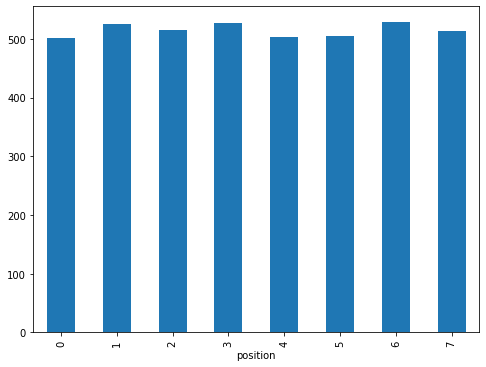

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
resumeDataSet.groupby('position').cleaned_resume.count().plot.bar(ylim=0)
plt.show()